# 决策树：Bike Sharing 数据集上的回归分析

## RMSE作为评价指标

1、 任务描述 请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。训练数据为2011年的数据，要求预测2012年每天的单车共享数量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset 1) 文件说明 
day.csv: 按天计的单车共享次数（作业只需使用该文件） 
hour.csv: 按小时计的单车共享次数（无需理会） 
readme：数据说明文件

2) 字段说明 
Instant记录号 
Dteday：日期 
Season：季节（1=春天、2=夏天、3=秋天、4=冬天） 
yr：年份，(0: 2011, 1:2012) 
mnth：月份( 1 to 12) 
hr：小时 (0 to 23) （只在hour.csv有，作业忽略此字段） 
holiday：是否是节假日 
weekday：星期中的哪天，取值为0～6 
workingday：是否工作日 1=工作日 （是否为工作日，1为工作日，0为非周末或节假日 weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾） temp：气温摄氏度 
atemp：体感温度 
hum：湿度 
windspeed：风速 

casual：非注册用户个数 
registered：注册用户个数 
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y
casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

In [1]:
# 导入必要的工具包
# 数据读取及基本处理
import pandas as pd
import numpy as np

#模型
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#模型评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  #评价回归预测模型的性能

#可视化
import matplotlib.pyplot as plt

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
# 读入数据
dpath = "./data/"

df = pd.read_csv(dpath + "FE_day.csv")

df.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


**准备训练数据**

In [3]:
# get labels
y = df['cnt']   
X = df.drop(['cnt'], axis=1)

In [4]:
# 用train_test_split 分割训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state = 0)

print("train samples:" ,X_train.shape)

('train samples:', (584, 34))


/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
#保存测试ID，用于结果提交
testID = X_test['instant']

#ID不参与预测
X_train.drop(['instant'], axis=1, inplace = True)
X_test.drop(['instant'], axis=1, inplace = True)

#保存特征名字以备后用（可视化）
feat_names = X_train.columns

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 决策树：默认参数

In [6]:
DT1 = DecisionTreeRegressor()

DT1.fit(X_train, y_train)

#训练上测试，训练误差，实际任务中这一步不需要
y_train_pred = DT1.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

y_test_pred = DT1.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" ,r2_score_train)
print("r2_score on Test set :" ,r2_score_test)

('RMSE on Training set :', 0.0)
('RMSE on Test set :', 833.3800041352787)
('r2_score on Training set :', 1.0)
('r2_score on Test set :', 0.8367037600582001)


训练集上的性能完美，测试集上性能不太好，过拟合

## 决策树：超参数调优

决策树的超参数有：
1. max_depth（树的深度）或max_leaf_nodes（叶子结点的数目）、
2. min_samples_leaf（叶子结点的最小样本数）、min_samples_split（中间结点的最小样本树）、
3. min_weight_fraction_leaf（叶子节点的样本权重占总权重的比例）
4. min_impurity_split（最小不纯净度）也可以调整
5. max_features（最大特征数目）、


在sklearn框架下，不同学习器的参数调整步骤相同：
设置参数搜索范围
生成GridSearchCV的实例（参数）
调用GridSearchCV的fit方法

In [7]:
#1.需要调优的参数
max_depth = range(4,20,1)
min_samples_leaf = range(4,20,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

#2. 生成学习器实例
DT2 = DecisionTreeRegressor()

# 3. 用训练数据度模型进行训练
grid = GridSearchCV(DT2, tuned_parameters,cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [4, 6, 8, 10, 12, 14, 16, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [8]:
#通过交叉验证得到的最佳超参数alpha
# examine the best model
print(-grid.best_score_)
print("Best params: ", grid.best_params_)

#训练上测试，训练误差，实际任务中这一步不需要
y_train_pred = grid.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

y_test_pred = grid.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :" ,rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :" ,r2_score_train)
print("r2_score on Test set :" ,r2_score_test)

709862.7896529487
('Best params: ', {'max_depth': 18, 'min_samples_leaf': 12})
('RMSE on Training set :', 676.6567688499181)
('RMSE on Test set :', 912.6162492138433)
('r2_score on Training set :', 0.8735184227787753)
('r2_score on Test set :', 0.8041757701170817)


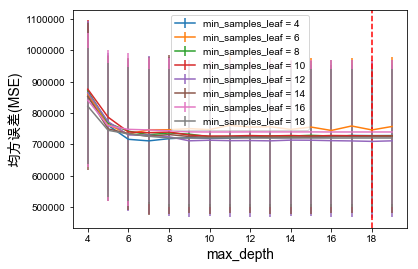

In [14]:
# plot CV误差曲线
test_means =- grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]

# plot results
n_Cs = len(max_depth)
number_gammas = len(min_samples_leaf)
test_scores = np.array(test_means).reshape(n_Cs,number_gammas)
test_stds = np.array(test_stds).reshape(n_Cs,number_gammas)

linestyle_list = [ '-', '--', '-.' ,':']
#, ls = linestyle_list[i]
x_axis = max_depth
for i, value in enumerate(min_samples_leaf):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = 'min_samples_leaf = ' + str(min_samples_leaf[i]))
    #plt.errorbar(x_axis, -train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')

#最佳超参数
plt.axvline(grid.best_params_['max_depth'], color='r', ls='--')

plt.legend(fontsize = 10)
plt.xlabel( 'max_depth',fontsize = 14 )                                                                                                      
plt.ylabel( u'均方误差(MSE)',fontsize = 14 )

plt.show()

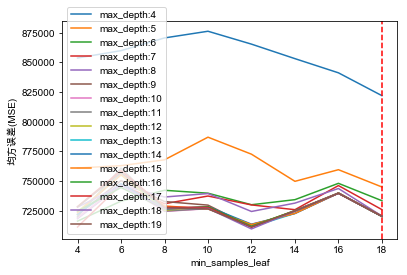

In [22]:
#DD.grid_scores_
test_means = -grid.cv_results_[ 'mean_test_score' ]

# plot results
test_scores = np.array(test_means).reshape(len(max_depth), len(min_samples_leaf ))

for i, value in enumerate(max_depth):
    plt.plot(min_samples_leaf, test_scores[i], label= 'max_depth:'   + str(value))

#最佳超参数
plt.axvline(grid.best_params_['max_depth'], color='r', ls='--')
    
plt.legend(loc='lower left')
plt.xlabel( 'min_samples_leaf' )                                                                                                      
plt.ylabel( u'均方误差(MSE)' )
plt.show()

 比默认参数模型的性能略好

max_depth在6-20之间，min_samples_leaf在8-14之间性能差异不太大

最佳模型的性能比默认参数情况下略好
性能比线性回归和SVR差，模型处于过拟合状态，决策树很容易过拟合

## 特征重要性

In [49]:
columns = X_train.columns

df_importance = pd.DataFrame({"columns":list(columns), "importance":list(grid.best_estimator_.feature_importances_.T)})
df_importance.sort_values(by=['importance'],ascending=False)

,columns,importance
26,temp,0.513382
32,yr,0.329757
0,season_1,0.061511
28,hum,0.056786
27,atemp,0.009555
29,windspeed,0.009260
12,mnth_9,0.006335
1,season_2,0.004500
4,mnth_1,0.003585
17,weathersit_2,0.002675


## 对测试集进行测试，生成提交文件

In [ ]:
y_test_pred = grid.predict(X_test)

#生成提交测试结果
df_test_result = pd.DataFrame({"instant":testID, 'cnt':y_test_pred})
df_test_result.to_csv( dpath + 'submission.csv')